# Context
## Image recognition is a vital component in robotics such as driverless vehicles or domestic robots. Image recognition is also important in image search engines such as Google or Bing image search whereby you use rich image content to query for similar stuff. Like in Google photos where the system uses image recognition to categorize your images into things like cats, dogs, people and so on so that you can quickly search your albums for things like, “give me photos of my cat”, that's awesome.



# Objective
# *You are working on a robotics project where you are required to train your robot so that it can differentiate between 5 animals or birds. Your task here is to build a deep learning model that helps you recognize the animal or bird in images.*

# About the Data

# The training dataset consists of about 9k medium quality animal images belonging to 5 categories: butterfly, sheep, cow, squirrel, elephant. - mucca (cow), pecora (sheep), elefante (elephant), farfalla (butterfly) and scoiattolo (squirrel). All the images have been collected from "google images" and have been checked by human. There is some erroneous data to simulate real conditions (eg. images taken by users of your app).

# Dataset Link:https://drive.google.com/file/d/176E-pLhoxTgWsJ3MeoJQV_GXczIA6g8D/view?usp=sharing



# From the above link you will be able to download a zip file named ‘animal_dataset_intermediate.zip’. After you extract this zip file, you will get three files:

1. train - contains five folders each folder containing images around 1000 to 2000 of those 5 five animals.  Each image has a unique name.
2. test - contains 910 random images of those 5 animals whose predictions you are to submit on DPhi platform.
3. Testing_set_animals.csv - this is the order of the predictions for each image that is to be submitted on the platform. Make sure the predictions you download are with their image’s filename in the same order as given in this file.

# Now Lets dive into Coding

In [ ]:
# importing necessary libraraies

from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
import tensorflow as tf


from keras.models import load_model
from keras.preprocessing import image
import numpy as np
from os import listdir
from os.path import isfile, join

In [ ]:
# 1. Download from shared google drive link
# Download from shared google drive link
# Ex: https://drive.google.com/file/d/176E-pLhoxTgWsJ3MeoJQV_GXczIA6g8D/view?usp=sharing
# Copy file id from the link : 176E-pLhoxTgWsJ3MeoJQV_GXczIA6g8D


from google_drive_downloader import GoogleDriveDownloader as gdd

gdd.download_file_from_google_drive(file_id='176E-pLhoxTgWsJ3MeoJQV_GXczIA6g8D',
                                    dest_path='/content/animals.zip',
                                    unzip=True)

In [ ]:
# Using inception_v3 model

import os

from tensorflow.keras import layers
from tensorflow.keras import Model
  
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [ ]:
local_weights_file = 'weights.h5'


In [ ]:
# Pretrained Model
pre_trained_model = InceptionV3(input_shape = (224, 224, 3), 
                                include_top = False, 
                                weights = 'imagenet')


In [ ]:
for layer in pre_trained_model.layers:
  layer.trainable = False


In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc')>0.959):
      print("\nReached 99.9% accuracy so cancelling training!")
      self.model.stop_training = True

In [ ]:
last_layer = pre_trained_model.get_layer('mixed7')
last_output = last_layer.output


In [ ]:
# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add two fully connected layers with 512 and 1,024 hidden units and ReLU activation
x = layers.Dense(512, activation='relu')(x)
x = layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)                  
# Add a final sigmoid layer for classification
x = layers.Dense  (1, activation='softmax')(x)           

model = Model( pre_trained_model.input, x) 

In [ ]:
# Model summary
from tensorflow.keras.optimizers import RMSprop
model.compile(optimizer = RMSprop(lr=0.0001), 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

# Loading & Pre-processing image data

# Loading and pre-processing an image dataset can be done in one of the following ways:

# Without any help from tensorflow/keras (using CV)
# Using: tf.keras.preprocessing.image_dataset_from_directory
# Using ImageData generators to load data

# What & Why Data Augmentation

# Pre-processing steps involve Data Augmentation which is nothing but cropping, re-sizing image, flipping an image horizontal/vertically, zooming etc.

# Through Data Augmentation, you can create synthentic data i.e different versions of same image (Eg: zoomed picture, horizontally flipped image etc) and train a neural network. This indirectly provides more data to neural networks allowing them to learn and perform better.

# Using ImageData generators to load data

In [ ]:


train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255., # rescaling
                                   rotation_range = 40,  # for augmentation
                                   width_shift_range = 0.2,
                                   validation_split = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1.0/255.,validation_split = 0.2)

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1.0/255.)

train_generator = train_datagen.flow_from_directory("animal_dataset_intermediate/train/",
                                                    batch_size = 32,
                                                    subset="training",
                                                    class_mode = 'categorical', 
                                                    target_size = (224, 224))

test_generator = test_datagen.flow_from_directory("animal_dataset_intermediate",
                                                    batch_size = 32,
                                                    class_mode = 'categorical', 
                                                    target_size = (224, 224))

val_generator = val_datagen.flow_from_directory("animal_dataset_intermediate/train",
                                                subset = "validation",
                                                    batch_size = 32,
                                                    class_mode = 'categorical', 
                                                    target_size = (224, 224))



Found 6558 images belonging to 5 classes.
Found 9106 images belonging to 2 classes.
Found 1638 images belonging to 5 classes.


In [ ]:
# Knowing the Class indices
print(train_generator.class_indices)

{'elefante_train': 0, 'farfalla_train': 1, 'mucca_train': 2, 'pecora_train': 3, 'scoiattolo_train': 4}


In [ ]:
print(train_generator.class_indices)

{'elefante_train': 0, 'farfalla_train': 1, 'mucca_train': 2, 'pecora_train': 3, 'scoiattolo_train': 4}


In [ ]:
class_names = ['elefante', 'farfalla', 'mucca', 'pecora', 'scoiattolo']
class_names


['elefante', 'farfalla', 'mucca', 'pecora', 'scoiattolo']

In [ ]:
imgs, labels = next(train_generator)

In [ ]:
from skimage import io

def imshow(image_RGB):
  io.imshow(image_RGB)
  io.show()

32
[0. 0. 0. 0. 1.]


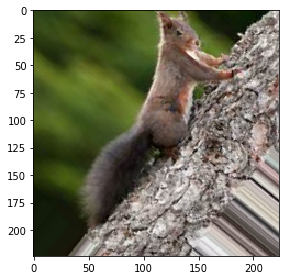

[0. 1. 0. 0. 0.]


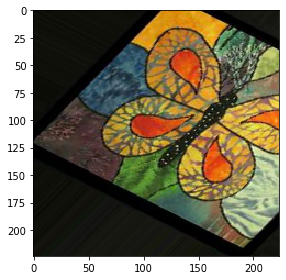

[0. 1. 0. 0. 0.]


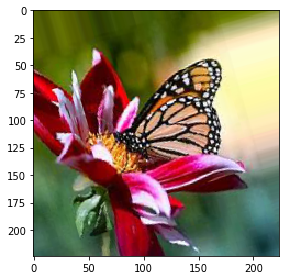

[0. 0. 0. 1. 0.]


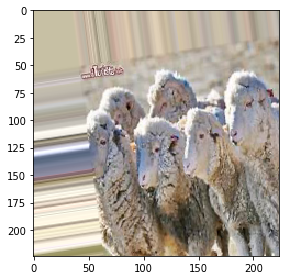

[0. 1. 0. 0. 0.]


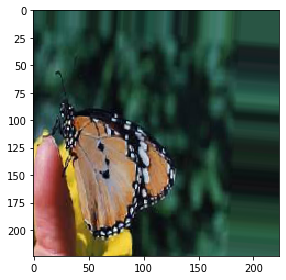

[0. 0. 0. 0. 1.]


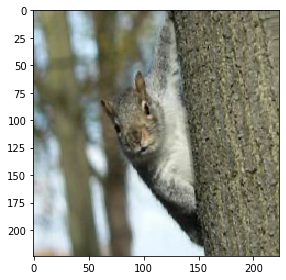

[0. 0. 1. 0. 0.]


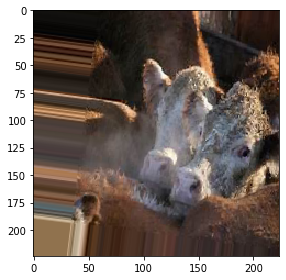

[1. 0. 0. 0. 0.]


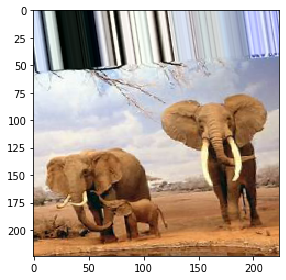

[0. 0. 0. 0. 1.]


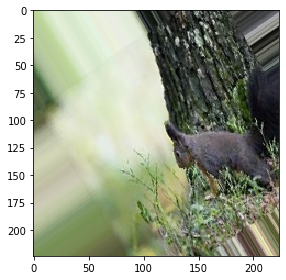

[1. 0. 0. 0. 0.]


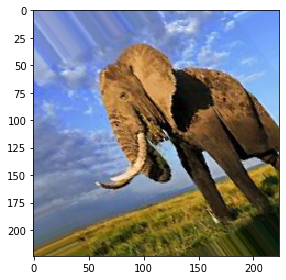

[1. 0. 0. 0. 0.]


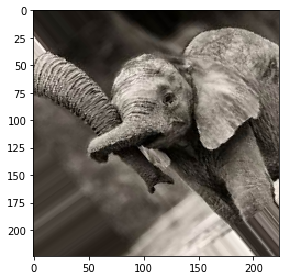

[1. 0. 0. 0. 0.]


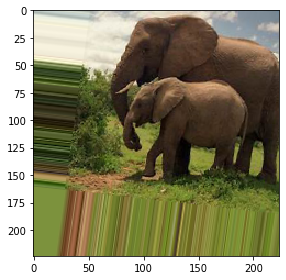

[0. 0. 0. 0. 1.]


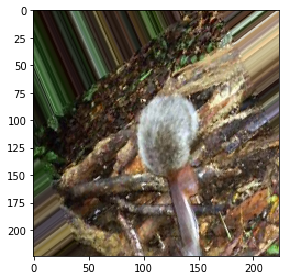

[1. 0. 0. 0. 0.]


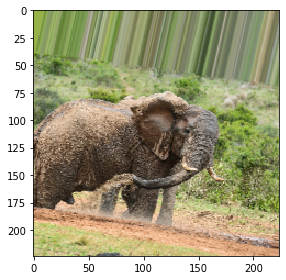

[0. 0. 1. 0. 0.]


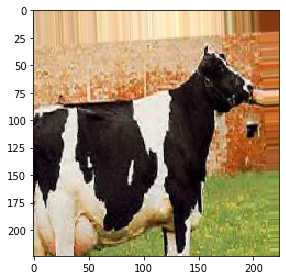

[0. 0. 0. 1. 0.]


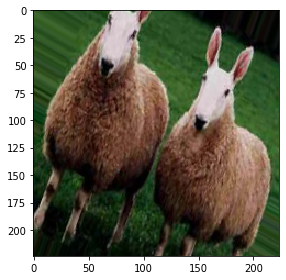

[0. 1. 0. 0. 0.]


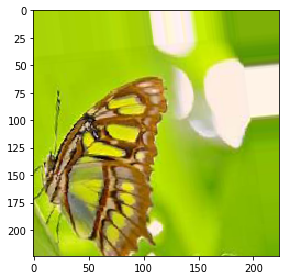

[0. 0. 1. 0. 0.]


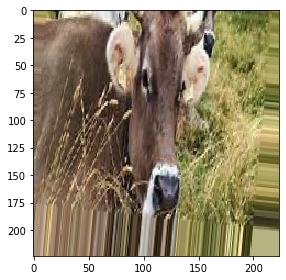

[0. 1. 0. 0. 0.]


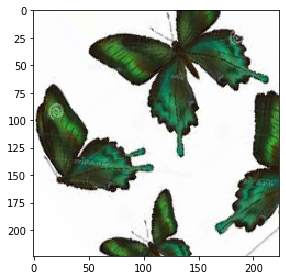

[0. 1. 0. 0. 0.]


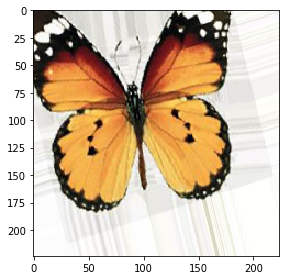

[0. 0. 1. 0. 0.]


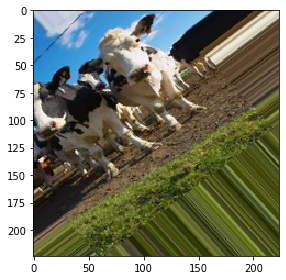

[0. 0. 1. 0. 0.]


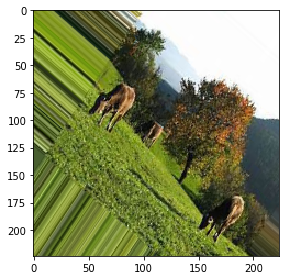

[1. 0. 0. 0. 0.]


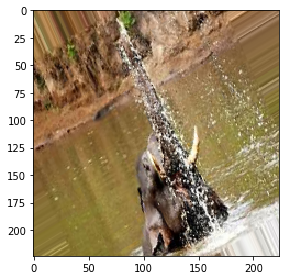

[0. 0. 1. 0. 0.]


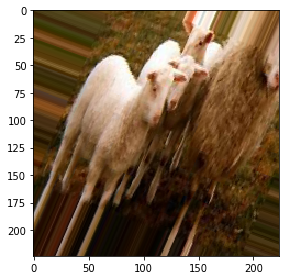

[1. 0. 0. 0. 0.]


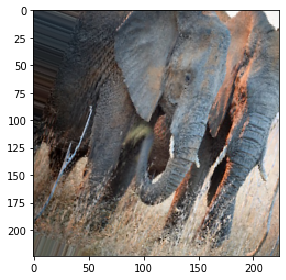

[0. 0. 0. 0. 1.]


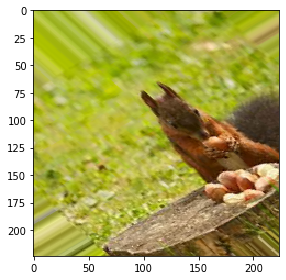

[0. 0. 1. 0. 0.]


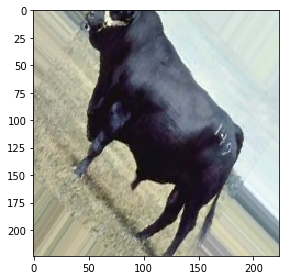

[0. 1. 0. 0. 0.]


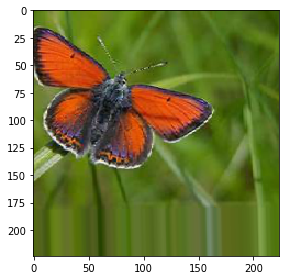

[0. 0. 0. 0. 1.]


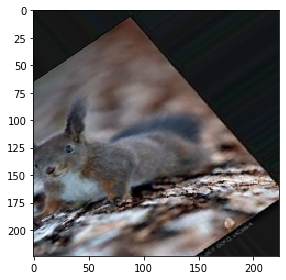

[0. 1. 0. 0. 0.]


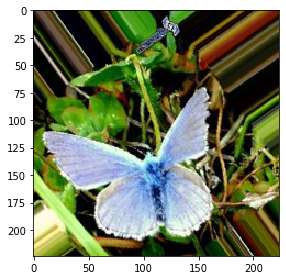

[0. 1. 0. 0. 0.]


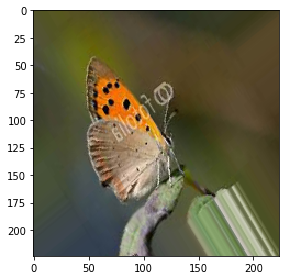

[0. 0. 0. 0. 1.]


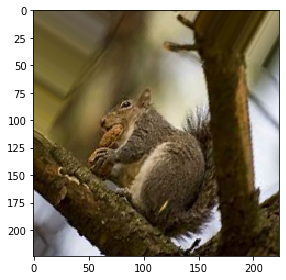

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
image_batch,label_batch = train_generator.next()

print(len(image_batch))
for i in range(0,len(image_batch)):
    image = image_batch[i]
    print(label_batch[i])
    imshow(image)

In [ ]:
#create the model and fit the data

history = model.fit(
            train_generator,
            validation_data = val_generator,
            steps_per_epoch = 100,
            epochs = 50,
            validation_steps = 50,
            verbose = 2)

Epoch 1/50
100/100 - 43s - loss: 0.6862 - accuracy: 0.9016 - val_loss: 0.2029 - val_accuracy: 0.9730
Epoch 2/50
100/100 - 42s - loss: 0.2619 - accuracy: 0.9647 - val_loss: 0.1579 - val_accuracy: 0.9771
Epoch 3/50
100/100 - 42s - loss: 0.2224 - accuracy: 0.9677 - val_loss: 0.1320 - val_accuracy: 0.9815
Epoch 4/50
100/100 - 42s - loss: 0.1817 - accuracy: 0.9736 - val_loss: 0.1851 - val_accuracy: 0.9750
Epoch 5/50
100/100 - 42s - loss: 0.1728 - accuracy: 0.9741 - val_loss: 0.1077 - val_accuracy: 0.9862
Epoch 6/50
100/100 - 42s - loss: 0.1591 - accuracy: 0.9781 - val_loss: 0.1577 - val_accuracy: 0.9799
Epoch 7/50
100/100 - 42s - loss: 0.1527 - accuracy: 0.9791 - val_loss: 0.1553 - val_accuracy: 0.9792
Epoch 8/50
100/100 - 42s - loss: 0.1540 - accuracy: 0.9791 - val_loss: 0.1045 - val_accuracy: 0.9869
Epoch 9/50
100/100 - 42s - loss: 0.1225 - accuracy: 0.9821 - val_loss: 0.1159 - val_accuracy: 0.9837
Epoch 10/50
100/100 - 42s - loss: 0.1477 - accuracy: 0.9800 - val_loss: 0.1247 - val_accura

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


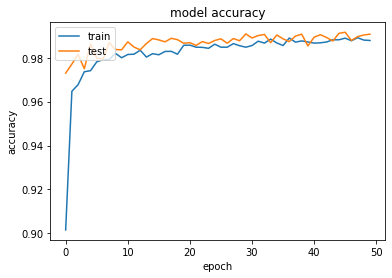

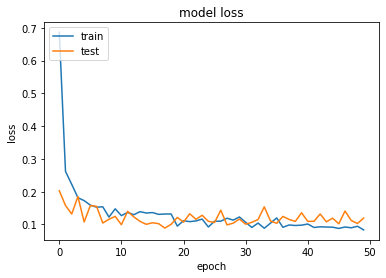

In [ ]:
# Plotting the Model Accuary and model loss

import matplotlib.pyplot as plt
%matplotlib inline

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Observation: Model has delivered good accuracy of 98.79% on train and validation accuracy of 99.07%
# training loss: 0.083 and validation loss:0.119

In [ ]:
# reading the Testing_set_animals for the predictions

import glob
import numpy as np
import pandas as pd
import cv2

In [ ]:
ord=pd.read_csv('/content/animal_dataset_intermediate/Testing_set_animals.csv')
ordered_files=ord['filename'].to_list()
ordered_files= [f"animal_dataset_intermediate/test/{x}" for x in ordered_files]
X_test=np.array([tf.keras.preprocessing.image.img_to_array(tf.keras.preprocessing.image.load_img(f)) for f in ordered_files])
X_test=X_test/255.
X_test

array([array([[[0.5921569 , 0.5764706 , 0.4627451 ],
        [0.5921569 , 0.5764706 , 0.4627451 ],
        [0.59607846, 0.5803922 , 0.46666667],
        ...,
        [0.42352942, 0.5019608 , 0.27058825],
        [0.42745098, 0.5058824 , 0.27450982],
        [0.42745098, 0.5058824 , 0.27450982]],

       [[0.5921569 , 0.5764706 , 0.4627451 ],
        [0.59607846, 0.5803922 , 0.46666667],
        [0.59607846, 0.5803922 , 0.46666667],
        ...,
        [0.42745098, 0.5058824 , 0.27450982],
        [0.42352942, 0.5019608 , 0.27058825],
        [0.42352942, 0.5019608 , 0.27058825]],

       [[0.5921569 , 0.5764706 , 0.4627451 ],
        [0.59607846, 0.5803922 , 0.46666667],
        [0.6       , 0.58431375, 0.47058824],
        ...,
        [0.42745098, 0.5058824 , 0.27450982],
        [0.42352942, 0.5019608 , 0.27058825],
        [0.42352942, 0.5019608 , 0.27058825]],

       ...,

       [[0.6313726 , 0.627451  , 0.3137255 ],
        [0.6313726 , 0.627451  , 0.3137255 ],
        [0.6313

In [ ]:
import cv2
def resize_image_array(img,img_size_dims):
  img=cv2.resize(img, dsize=img_size_dims,
  interpolation=cv2.INTER_CUBIC)               
  imp=np.array(img, dtype=np.float32)
  return img

In [ ]:
# Resizing the image
X_test=np.array([resize_image_array(img,img_size_dims=(224,224)) for img in X_test])

In [ ]:
# Predicting the model

preds = model.predict(X_test)
#if using softmax activation on output layer
predicted_labels  = np.argmax(preds,axis=1)


In [ ]:
#Accessing classnames with predicted clases
final_predictions = [class_names[i] for i in predicted_labels]

In [ ]:
final_predictions

['farfalla',
 'farfalla',
 'farfalla',
 'farfalla',
 'farfalla',
 'farfalla',
 'elefante',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'elefante',
 'elefante',
 'elefante',
 'pecora',
 'farfalla',
 'elefante',
 'elefante',
 'pecora',
 'farfalla',
 'pecora',
 'elefante',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'elefante',
 'farfalla',
 'farfalla',
 'farfalla',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'elefante',
 'pecora',
 'pecora',
 'pecora',
 'farfalla',
 'farfalla',
 'pecora',
 'farfalla',
 'pecora',
 'pecora',
 'elefante',
 'elefante',
 'elefante',
 'elefante',
 'elefante',
 'elefante',
 'farfalla',
 'farfalla',
 'farfalla',
 'pecora',
 'farfalla',
 'pecora',
 'elefante',
 'farfalla',
 'pecora',
 'pecora',
 'farfalla',
 'farfalla',
 'farfalla',
 'pecora',
 'farfalla',
 'pecora',
 'farfalla',
 'farfalla',
 'pecora',
 'pecora',
 'farfalla',
 'pecora',
 'pecora',
 'pecora',
 'farfalla',
 'elefante',
 'elefante',
 'farfalla',
 'farfalla',
 'farfalla',
 'farfalla',


In [ ]:
res=pd.DataFrame(final_predictions)

In [ ]:
# saving the predictions to csv files
from google.colab import files
res.to_csv("predictions.csv",index=False)
files.download("predictions.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Conclusion:
# This model is best fit and able to make the prediction with training dataset with 98% of accuracy. We have used transfer Learning technique with Inception_V3 and used Image Data generator to load the dataset


